## Coffee Farms and Conditions
- How does the farm’s owner and processing methods affect the coffee’s perceived flavor?
- Does the quantity of coffee a farm produce affect the quality of the coffee? (i.e. the more coffees they produce, the lower quality the coffee?)
- Is there a seasonal effect on the production of high (or low) quality coffee?


In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style
sns.set_style('whitegrid')
%matplotlib inline

In [ ]:
# Read in data
df = pd.read_csv('arabica_coffee_cleaned.csv')
df = df.iloc[:, 1:]
df.head()

,owner,country_of_origin,farm_name,mill,company,region,producer,number_of_bags,bag_weight,in_country_partner,...,total_cup_points,moisture,category_one_defects,quakers,color,category_two_defects,expiration,certification_body,mean_altitude_feet,bag_weight_lbs
0,metad plc,Ethiopia,metad plc,metad plc,metad agricultural developmet plc,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,...,90.58,0.12,0,0.0,Green,0,2016-04-03,METAD Agricultural Development plc,6807.743000,132.2772
1,metad plc,Ethiopia,metad plc,metad plc,metad agricultural developmet plc,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,...,89.92,0.12,0,0.0,Green,1,2016-04-03,METAD Agricultural Development plc,6807.743000,132.2772
2,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,wolensu,yidnekachew debessa coffee plantation,oromia,Yidnekachew Dabessa Coffee Plantation,320,60 kg,METAD Agricultural Development plc,...,89.00,0.11,0,0.0,Green,2,2016-03-25,METAD Agricultural Development plc,6561.680000,132.2772
3,metad plc,Ethiopia,metad plc,metad plc,metad agricultural developmet plc,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,...,88.83,0.12,0,0.0,Green,2,2016-04-03,METAD Agricultural Development plc,6807.743000,132.2772
4,ji-ae ahn,Brazil,No Farm name Specified,No Mill Specified,No Company Specified,No Region Specified,No Producer Specified,100,30 kg,Specialty Coffee Institute of Asia,...,88.83,0.11,0,0.0,Bluish-Green,1,2014-09-03,Specialty Coffee Institute of Asia,2407.042947,66.1386


# Processing Methods

Washed / Wet                 800
Natural / Dry                247
Other                        126
Semi-washed / Semi-pulped     56
Pulped natural / honey        12
Name: processing_method, dtype: int64


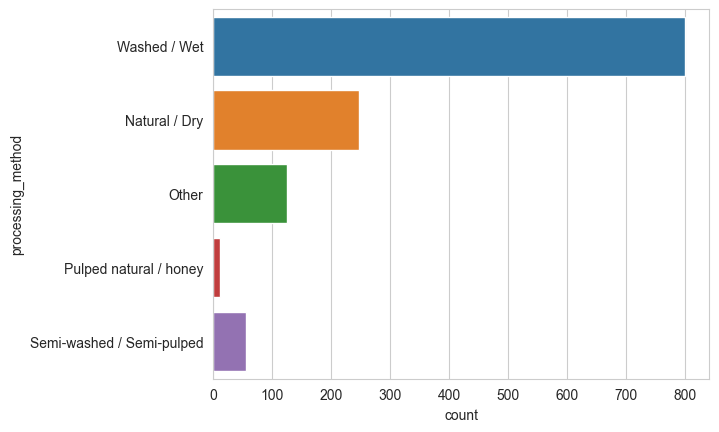

In [ ]:
# Processing methods
sns.countplot(y=df['processing_method'])
print(df['processing_method'].value_counts())

<AxesSubplot:xlabel='total_cup_points', ylabel='processing_method'>

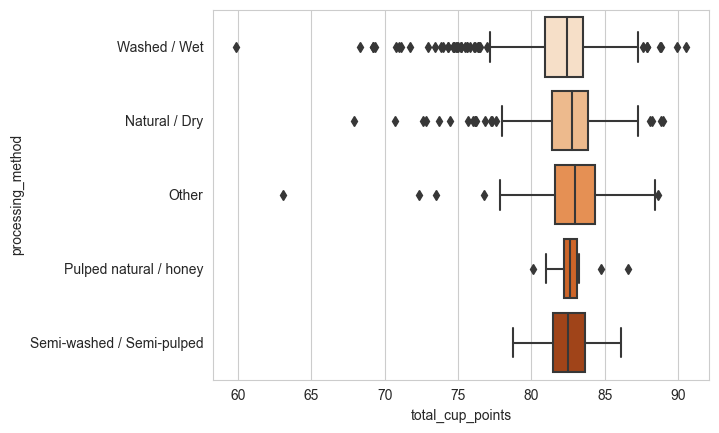

In [ ]:
# clearly, we have an outlier in the data -> should go back and adjust this outlier, but for now we'll simply remove it
df = df[df['total_cup_points'] > 40]
sns.boxplot(y=df['processing_method'], x=df['total_cup_points'], palette='Oranges')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:254: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves


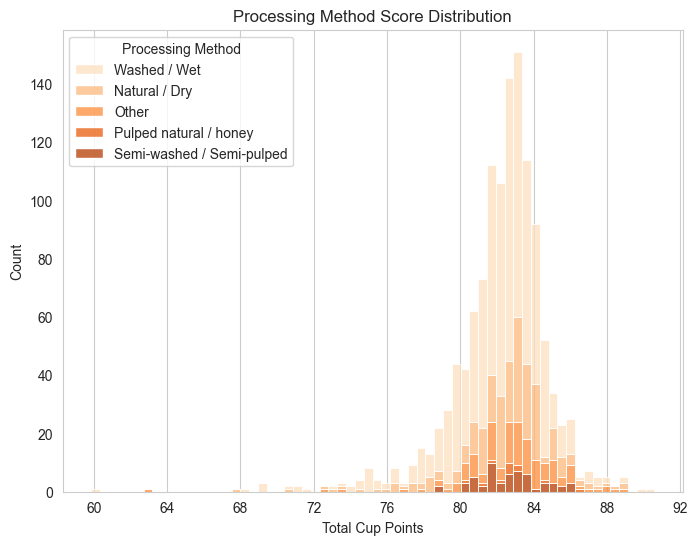

In [ ]:
plt.figure(figsize=(8, 6))
# Look at the distributions together:
df_renamed = df.rename(columns={'processing_method': 'Processing Method'})
sns.histplot(data=df_renamed, x='total_cup_points', hue='Processing Method', multiple='stack', palette='Oranges')

labels = [i for i in range(60, 95, 4)]
plt.xticks(labels)

# Label the Axes
plt.title('Processing Method Score Distribution')
plt.xlabel('Total Cup Points')

# Remove gridlines
plt.grid(b=None, axis='y')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:254: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves


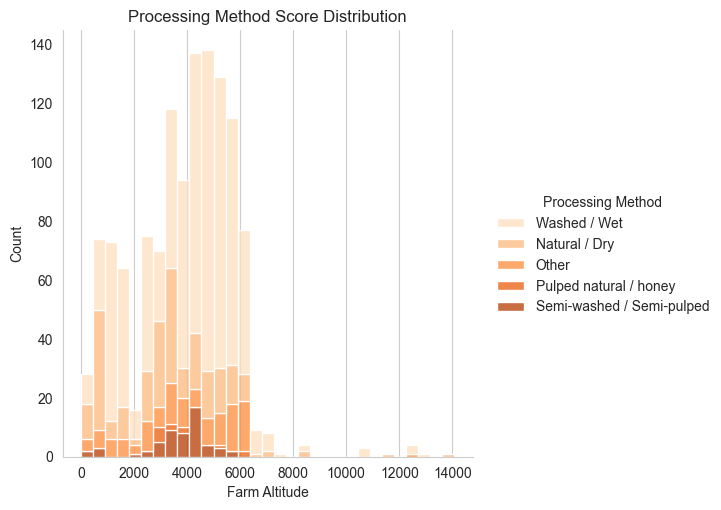

In [ ]:
# Look at the distributions together:
df_renamed = df.rename(columns={'processing_method': 'Processing Method'})
sns.displot(data=df_renamed, x='mean_altitude_feet', hue='Processing Method', multiple='stack', palette='Oranges')

# Label the Axes
plt.title('Processing Method Score Distribution')
plt.xlabel('Farm Altitude')

# Remove gridlines
plt.grid(b=None, axis='y')

As expected, the `Washed / Wet` has the broadest distribution since it has the largest amount of records. In general, we see the trend that the smaller the amount of observations, the narrower the distributions (`Pulped natural / honey` having the lowest amount of observations and tightest distribution).

[] Remember to look at the most popular processing methods

In [ ]:
# Let's do some grouping operations now to investigate some other information about the processing methods
group_processing = df.groupby('processing_method')

# Continuing with some of the processing method grouping, let's take a look at some of the other grading characteristics:
grading_vars = [
    'aroma', 'flavor', 'aftertaste', 'acidity', 'body',
    'balance', 'uniformity', 'clean_cup', 'sweetness', 'cupper_points'
]

grading_vars_df = group_processing.mean()[grading_vars]
grading_vars_df.style.set_precision(2).background_gradient(cmap='Oranges')

/var/folders/2k/x7l_3ys55bj50sk6gnskm0km0000gn/T/ipykernel_1221/2664678977.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grading_vars_df = group_processing.mean()[grading_vars]
/var/folders/2k/x7l_3ys55bj50sk6gnskm0km0000gn/T/ipykernel_1221/2664678977.py:11: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  grading_vars_df.style.set_precision(2).background_gradient(cmap='Oranges')


,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points
processing_method,,,,,,,,,,
Natural / Dry,7.59,7.58,7.46,7.55,7.59,7.59,9.79,9.80,9.82,7.58
Other,7.61,7.61,7.49,7.58,7.55,7.58,9.88,9.88,9.92,7.66
Pulped natural / honey,7.54,7.51,7.53,7.55,7.62,7.52,10.00,10.00,10.00,7.54
Semi-washed / Semi-pulped,7.60,7.59,7.46,7.54,7.55,7.58,9.87,9.95,9.95,7.54
Washed / Wet,7.55,7.48,7.36,7.53,7.49,7.48,9.85,9.83,9.93,7.44


In [ ]:
# Let's do some grouping operations now to investigate some other information about the processing methods
group_processing = df.groupby('processing_method')

# Continuing with some of the processing method grouping, let's take a look at some of the other grading characteristics:
grading_vars = [
    'aroma', 'flavor', 'aftertaste', 'acidity', 'body',
    'balance', 'uniformity', 'clean_cup', 'sweetness', 'cupper_points'
]

grading_vars_df = group_processing.max()[grading_vars]
grading_vars_df.style.set_precision(2).background_gradient(cmap='Oranges')

/var/folders/2k/x7l_3ys55bj50sk6gnskm0km0000gn/T/ipykernel_1221/1499234474.py:11: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`



,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points
processing_method,,,,,,,,,,
Natural / Dry,8.58,8.67,8.50,8.50,8.50,8.58,10.00,10.00,10.00,8.67
Other,8.67,8.67,8.58,8.42,8.58,8.75,10.00,10.00,10.00,10.00
Pulped natural / honey,8.00,8.00,8.00,8.25,8.00,8.17,10.00,10.00,10.00,8.17
Semi-washed / Semi-pulped,8.50,8.17,8.00,8.08,8.33,8.25,10.00,10.00,10.00,8.42
Washed / Wet,8.75,8.83,8.67,8.75,8.50,8.58,10.00,10.00,10.00,8.75


In [ ]:
def get_range(col):
    """Quick function to find the range"""
    return np.max(col) - np.min(col)

grading_vars_df.apply(get_range).sort_values(ascending=False)

cupper_points    1.83
flavor           0.83
aroma            0.75
aftertaste       0.67
acidity          0.67
body             0.58
balance          0.58
uniformity       0.00
clean_cup        0.00
sweetness        0.00
dtype: float64

The largest average difference we see are in the `cupper_points`, `uniformity`, and `clean_cup` variables. From my understanding, at lesat the `cupper_points` and the `clean_cup` are rather subjective and don't have much to do with the actual processing of the coffee. 

[] Get a better understanding of the `cupper_points` and `clean_cup` columns

In [ ]:
# Apply a custom function to view the distirbution of countries using each processing method
def get_top_countries(df):
    # 3b YOUR CODE HERE
    return df['country_of_origin'].value_counts().head()

# Return a dataframe object for cleaner viewing
pd.DataFrame(group_processing.apply(get_top_countries))

country_of_origin
processing_method                                                    
Natural / Dry             Brazil                                   79
                          United States of America                 40
                          Colombia                                 27
                          Mexico                                   17
                          Ethiopia                                 15
Other                     Colombia                                 25
                          Ethiopia                                 17
                          Taiwan                                   14
                          Brazil                                   13
                          Nicaragua                                 8
Pulped natural / honey    Brazil                                    6
                          Taiwan                                    2
                          Costa Rica                                2
                          Thailand                                  1
                          China                                     1
Semi-washed / Semi-pulped Brazil                                   24
                          Mexico                                   14
                          Taiwan                                    9
                          Indonesia                                 5
                          Uganda                                    1
Washed / Wet              Mexico                                  198
                          Guatemala                               160
                          Colombia                                121
                          Costa Rica                               42
                          Taiwan                                   37

# Farms/Companies/Owners

In [ ]:
# These columns are quite unique in that they may have quite similar values across the board
# So let's see how many unique values each of these have
farm_cols = ['owner', 'farm_name', 'mill', 'company', 'producer']

for col in farm_cols:
  unique_vals = len(df[col].unique())
  print(f'No. of Unique Values for {col}: {unique_vals}')

No. of Unique Values for owner: 296
No. of Unique Values for farm_name: 548
No. of Unique Values for mill: 438
No. of Unique Values for company: 267
No. of Unique Values for producer: 656


[] In general, have to get a better understanding of each of these columns

In [ ]:
# One question I would like to answer is if the companies tend to have higher scoring coffee
group_owner = df.groupby('owner')

# Now, let's collect the scores of each of the groups
group_owner.count().sort_values(by='country_of_origin', ascending=False)

,country_of_origin,farm_name,mill,company,region,producer,number_of_bags,bag_weight,in_country_partner,harvest_year,...,total_cup_points,moisture,category_one_defects,quakers,color,category_two_defects,expiration,certification_body,mean_altitude_feet,bag_weight_lbs
owner,,,,,,,,,,,,,,,,,,,,,
juan luis alvarado romero,154,154,154,154,154,154,154,154,154,154,...,154,154,154,154,154,154,154,154,154,154
exportadora de cafe condor s.a,54,54,54,54,54,54,54,54,54,54,...,54,54,54,53,54,54,54,54,54,54
racafe & cia s.c.a,51,51,51,51,51,51,51,51,51,51,...,51,51,51,51,51,51,51,51,51,51
ipanema coffees,50,50,50,50,50,50,50,50,50,50,...,50,50,50,50,50,50,50,50,50,50
cqi taiwan icp cqi台灣合作夥伴,47,47,47,47,47,47,47,47,47,47,...,47,47,47,47,47,47,47,47,47,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
acacia hills ltd,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
jose armando norberto borzani lemini,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
jose daniel cobilt castro,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
# Aggregating by the count of the country (as a proxy for number of observations) and by the mean score of the cup
owner_group_points = group_owner.agg({'country_of_origin': 'count', 'total_cup_points': 'mean'}).sort_values(by='country_of_origin', ascending=False)
owner_group_points = owner_group_points.rename({'country_of_origin': 'coffee_cups', 'total_cup_points': 'average_score'}, axis=1)
owner_group_points

,coffee_cups,average_score
owner,,
juan luis alvarado romero,154,81.645390
exportadora de cafe condor s.a,54,82.989259
racafe & cia s.c.a,51,83.370980
ipanema coffees,50,82.493200
cqi taiwan icp cqi台灣合作夥伴,47,81.780851
...,...,...
acacia hills ltd,1,81.580000
jose armando norberto borzani lemini,1,71.080000
jose daniel cobilt castro,1,82.420000


In [ ]:
# Binning the different company sizes
cut_labels_4 = ['single-cup (1)', 'small (1-10)', 'medium (10-20)', 'large (> 20)']
cut_bins = [0, 1, 10, 20, 160]
owner_group_points['company_size'] = pd.cut(owner_group_points['coffee_cups'], bins=cut_bins, labels=cut_labels_4)
owner_group_points['company_size'] = owner_group_points['company_size'].astype(object)

Text(0.5, 0, 'Company Size')

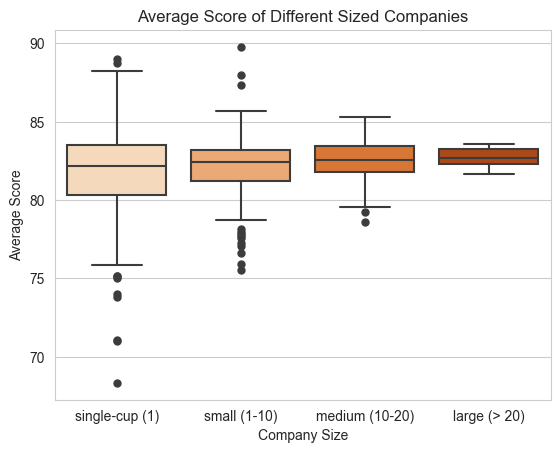

In [ ]:
# Generate the plot for the different company sizes
sns.boxplot(
    x='company_size', 
    y='average_score', 
    data=owner_group_points, 
    palette='Oranges', 
    flierprops={"marker": "o"},
    order=['single-cup (1)', 'small (1-10)', 'medium (10-20)', 'large (> 20)'])

# Title and Axes
plt.title('Average Score of Different Sized Companies')
plt.ylabel('Average Score')
plt.xlabel('Company Size')

(65.0, 90.0)

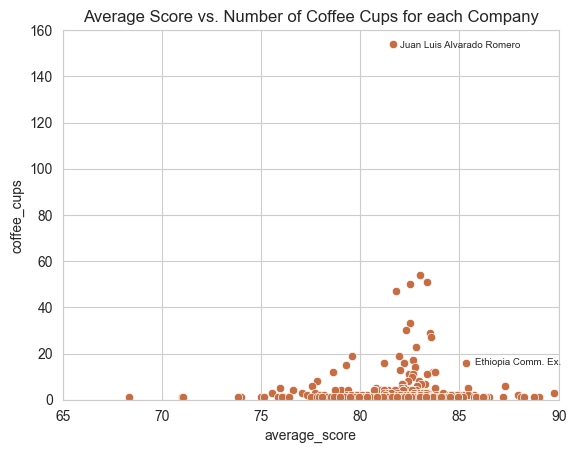

In [ ]:
# Plotting the previous dataframe
sns.scatterplot(x='average_score', y='coffee_cups', data=owner_group_points, color='#c86d42')
plt.title('Average Score vs. Number of Coffee Cups for each Company')
plt.annotate('Juan Luis Alvarado Romero', (82, 152.5), fontsize=7)
plt.annotate('Ethiopia Comm. Ex.', (85.8, 15), fontsize=7)

plt.ylim(0, 160)
plt.xlim(65, 90)

[ ] Label the points here

In [ ]:
# Taking a quick look at the owners with a greater score than 85
owner_group_points[owner_group_points['average_score'] > 85]


,coffee_cups,average_score,company_size
owner,,,
ethiopia commodity exchange,16,85.327500,medium (10-20)
cqi q coffee sample representative,6,87.320000,small (1-10)
grounds for health admin,5,85.418000,small (1-10)
metad plc,3,89.776667,small (1-10)
great lakes coffee uganda,2,85.710000,small (1-10)
rashid moledina & co. (msa) ltd.,2,85.165000,small (1-10)
ji-ae ahn,2,87.955000,small (1-10)
assefa belay coffee producer,2,85.460000,small (1-10)
daniel magu,2,85.415000,small (1-10)


On first look this is not an extraordinary graph but it does tell us something quite insightful. Companies that have a lot of coffee cups being graded (and thus we can assume are large processing facilities) typically make quite average coffee.

In [ ]:
# Aggregating by the count of the country (as a proxy for number of observations) and by the mean score of the cup
group_owner_std = group_owner.agg({'country_of_origin': 'count', 'total_cup_points': 'std'}).sort_values(by='country_of_origin', ascending=False)
group_owner_std = group_owner_std.rename({'country_of_origin': 'coffee_cups', 'total_cup_points': 'score_std'}, axis=1)
group_owner_std

,coffee_cups,score_std
owner,,
juan luis alvarado romero,154,2.966996
exportadora de cafe condor s.a,54,1.157112
racafe & cia s.c.a,51,0.950550
ipanema coffees,50,1.118772
cqi taiwan icp cqi台灣合作夥伴,47,1.314760
...,...,...
acacia hills ltd,1,NaN
jose armando norberto borzani lemini,1,NaN
jose daniel cobilt castro,1,NaN


<AxesSubplot:xlabel='score_std', ylabel='coffee_cups'>

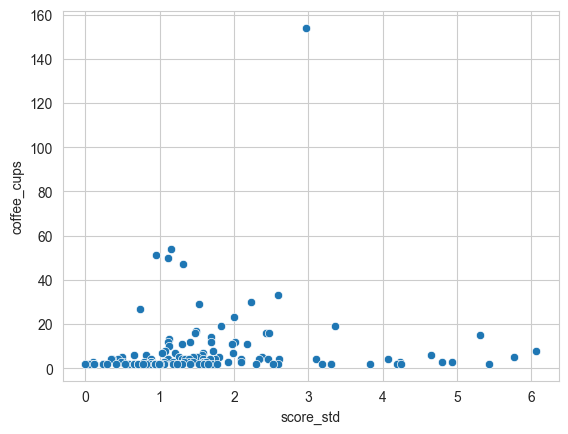

In [ ]:
# Plotting the previous created dataframe
sns.scatterplot(x='score_std', y='coffee_cups', data=group_owner_std)

Similar to the other plot, nothing too particularly intersting at first glance. However, what we can extroplate from this graph is that even the companies there doesn't seem to be a major difference in the breadth of the coffee scores between the smaller and larger coffee companies. 

# Seasonality

In [ ]:
df.columns

Index(['owner', 'country_of_origin', 'farm_name', 'mill', 'company', 'region',
       'producer', 'number_of_bags', 'bag_weight', 'in_country_partner',
       'harvest_year', 'grading_date', 'variety', 'processing_method', 'aroma',
       'flavor', 'aftertaste', 'acidity', 'body', 'balance', 'uniformity',
       'clean_cup', 'sweetness', 'cupper_points', 'total_cup_points',
       'moisture', 'category_one_defects', 'quakers', 'color',
       'category_two_defects', 'expiration', 'certification_body',
       'mean_altitude_feet', 'bag_weight_lbs'],
      dtype='object')

In [ ]:
date_cols = ['grading_date', 'harvest_year', 'expiration']
df[date_cols]

,grading_date,harvest_year,expiration
0,2015-04-04,2014,2016-04-03
1,2015-04-04,2014,2016-04-03
2,2015-03-26,2014,2016-03-25
3,2015-04-04,2014,2016-04-03
4,2013-09-03,2013,2014-09-03
...,...,...,...
1236,2014-05-15,2014,2015-05-15
1237,2012-09-17,2012,2013-09-17
1238,2012-05-24,2012,2013-05-24
1239,2017-06-06,2016,2018-06-06


In [ ]:
# Convert the grading date and expiration cols to datetime objects
df['grading_date'] = pd.to_datetime(df['grading_date'])
df['expiration'] = pd.to_datetime(df['expiration'])

In [ ]:
# The key thing is to group by the year and see what sort of results we can come up with
group_year = df.groupby('harvest_year')

# Taking the mean of the year
group_year_df = group_year.agg({'country_of_origin': 'count', 'total_cup_points': 'mean'})

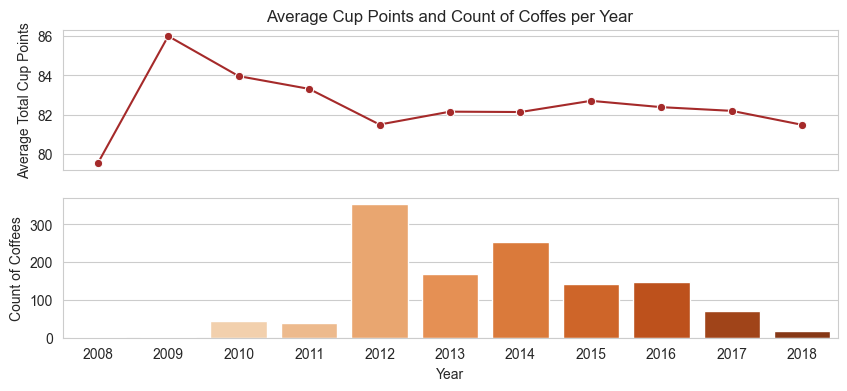

In [ ]:
# Plot the aggregated data

# Created subplots for two graphs
fig, ax = plt.subplots(nrows=2, figsize=(10,4))

# Plot both graphs
sns.lineplot(x=group_year_df.index, y=group_year_df['total_cup_points'], marker='o', ax=ax[0], color='Brown')
sns.barplot(x=group_year_df.index, y=group_year_df['country_of_origin'], ax=ax[1], palette='Oranges')

# Formatting the graph combo
ax[0].set_title('Average Cup Points and Count of Coffes per Year')
ax[0].axes.get_xaxis().set_visible(False)
ax[0].set_ylabel('Average Total Cup Points')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Count of Coffees')
plt.show()

# Altitude

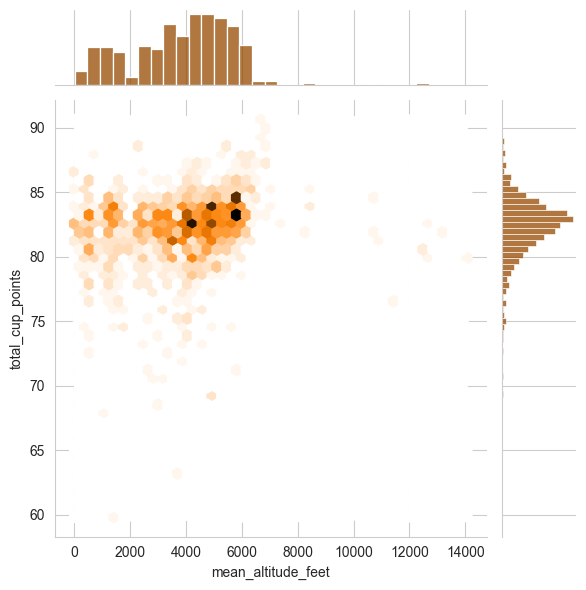

In [ ]:
sns.jointplot(x='mean_altitude_feet', y='total_cup_points', data=df, kind='hex', color='#964B00')